In [1]:
# System
import sys
import os
from os import listdir,mkdir
from os.path import join,isdir,isfile

# I/O
import imageio as io
import nibabel as nib

# Tools: Basic
import cv2
import numpy as np

# Tools: ML

# Project Specific
from brainmets.utils import smart_ls, normalize_volume, preproc_volume

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 16,9

In [5]:
def save_volume(path_save, vol):
    if not isdir(path_save):
        mkdir(path_save)
    
    new_vol = (vol*255).astype(np.uint8)
    for ii in range(1,vol.shape[2]-1):
        img = new_vol[:,:,(ii-1):(ii+2)]
        name_img = "{:03d}".format(ii) + '.png'
        io.imwrite(join(path_save, name_img), img)
    return 0

In [6]:
path_data_orig = "/home/bmcv/data_nas/StanfordMets"
path_data_save = "/home/bmcv/data_scratch/StanfordMets512"
if not isdir(path_data_save):
    mkdir(path_data_save)

for ii,name_pt in enumerate(smart_ls(path_data_orig)):
    path_data_save_pt = join(path_data_save, name_pt)
    if not isdir(path_data_save_pt):
        mkdir(path_data_save_pt)
    
    bravo = nib.load(join(path_data_orig,name_pt,"bravo.nii.gz")).get_fdata()
    bravo = preproc_volume(bravo)
    save_volume(join(path_data_save_pt, 'bravo'), bravo)
    break

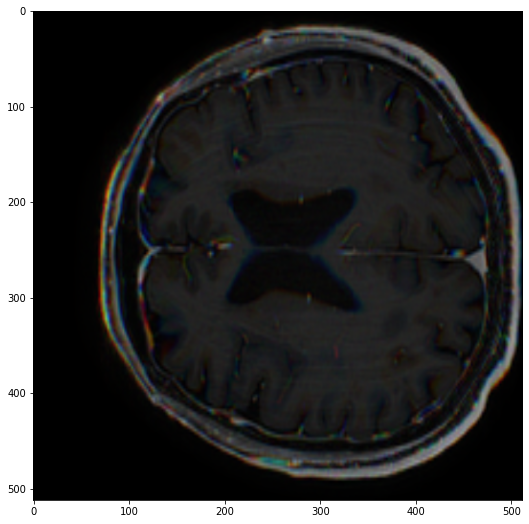

In [12]:
path_imgs = "/home/bmcv/data_scratch/StanfordMets1024/Mets_005/bravo"
path_img = join(path_imgs, np.random.choice(smart_ls(path_imgs)))

img = io.imread(path_img)
plt.imshow(img)

In [8]:
name_pt

'Mets_005'

In [ ]:
ys,xs,zs = np.where(bravo)

In [ ]:
ys.min()

In [ ]:
import cv2

In [ ]:
test = cv2.resize(normalize_volume(nib.load(join(path_data_orig,name_pt,"bravo.nii.gz")).get_fdata()),(512,512))

In [ ]:
plt.imshow(test[:,:,130])

In [ ]:
test.shape

In [ ]:
normalize_volume(nib.load(join(path_data_orig,name_pt,"bravo.nii.gz")).get_fdata()).shape